In [50]:
import pandas as pd
import numpy as np
import MHR as mhr
import sys
import types
import MHR as mhr
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline
import time


def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

In [51]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
B00BGA9WK2,351,253.079772
B00A3YN0Z0,219,104.237443
B0074BW614,201,451.900498
B00CMQTVK0,165,334.696970
B0094NY3R0,147,232.972789
B0045FM6SU,140,374.121429
B00DVFLJDS,139,352.625899
B009LL9VDG,133,424.443609
B002C7481G,132,501.636364


In [52]:
import matplotlib.pyplot as plt
import time
#PR_HS_LEN_performance = pd.read_csv('data/performance_PR_HS_LEN.csv')
#PR_HS_LEN_performance.head()
min_votes=5

grouped=reviews_features[reviews_features['tot'].astype(int)>min_votes].groupby('asin')
total = len(grouped)
run = 0
performance=[]
n_product=0
elapsed=0
names=[]
for name, group in grouped:
    names.append(name)
    
    df = reviews_features[reviews_features['asin'].isin(names)]
    start = time.time()
    df,ndcg_mhr = mhr.executeFromDf(df )
    end = time.time()
    elapsed = (end - start) + elapsed
    
    n_product = len(df) 
    tempo={}
    tempo['product']=name
    tempo['tot_product']=n_product
    tempo['time']=elapsed
    performance.append(tempo)
    if run > 20:
        break
    run = run+1


product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=B00000J061 ndcg=0.919644289483 (0.942628940332)
product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=B00000J061 ndcg=0.919644289483 (0.942628940332)
product=B00001P4ZH ndcg=0.924356072835 (0.933779639539)
product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=B00000J061 ndcg=0.919644289483 (0.942628940332)
product=B00001P4ZH ndcg=0.924356072835 (0.933779639539)
product=B00001WRSJ ndcg=0.939194508097 (0.983709813881)
product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=B00000J061 ndcg=0.919644289483 (0.942628940332)
product=B00001P4ZH ndcg=0.924356072835 (0.933779639539)
product=B00001WRSJ ndcg=0.939194508097 (0.983709813881)
product=B000031KIM ndcg=0.943877163561 (0.962607785418)
product=1400532655 ndcg=0.896659638634 (0.896659638634)
product=B00000J061 ndcg=0.919644289483 (0.942628940332)
product=B00001P4ZH ndcg=0.924356072835 (0.933779

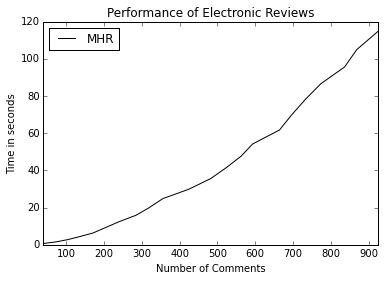

In [53]:
ax=pd.DataFrame(performance).plot('tot_product','time' ,label="MHR",color='k', title="Performance of Electronic Reviews")
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Time in seconds")
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines[:2], "MHR", loc='best') 